# Load mnist56 data
These are the images of handwritten digits 5's and 6s, with some added noise.

In [1]:
import _pickle
import numpy as np

with open('mnist56.pkl', 'rb') as f:
    (XLS, yLS, XVS, yVS, XTS, yTS) = _pickle.load(f)
    
# (XLS, yLS) = training set
# (XVS, yVS) = validation set
# (XTS, yTS) = test set
    
# Extract a subset of the dataset for this tutorial
XLS = XLS[:100]
yLS = yLS[:100]
XVS = XVS[:50]
yVS = yVS[:50]
XTS = XTS[:50]
yTS = yTS[:50]

XLS = np.array(XLS)
XVS = np.array(XVS)
XTS = np.array(XTS)

# Show an image

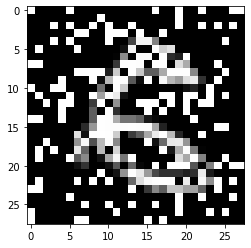

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(XLS[0], cmap='gray', vmin=0, vmax=255)
plt.show()

# Image classification with PRS

        
### Input arguments of `PRS_image`:

**PRS_image**(*XLS, yLS, XVS, yVS, estimator, estimator_kwargs, isClassification, normalize_data=True, alphas_init=None, lambda1=0, lambda2=0, nmodels=100, batch_size=None, train_size=None, nepochs=3000, learning_rate=0.001, rho1=0.9, rho2=0.999, variance_reduction=True, XTS=None, random_seed=100*)
          

**XLS**: Array of shape (n_samples_LS, H, W). Inputs (images) of the training set. H=Height, W=Width.

**yLS**: Array of shape (n_samples_LS,). Outputs of the training set.

**XVS**: Array of shape (n_samples_VS, H, W). Inputs (images) of the validation set.

**yVS**: Array of shape (n_samples_VS,). Outputs of the validation set.

**estimator**: scikit-learn learner class (type of base learner).

**estimator_kwargs**: dictionary containing the hyper-parameters of the estimator. The dictionary does not need to contain all the hyper-parameter values. When a hyper-parameter is missing from the dictionary, it is set to the default value used by scikit-learn.

**isClassification**: Boolean indicating if this is a classification problem or not (otherwise it is a regression problem).

**normalize_data**: Boolean indicating if input data must be normalized. default=_True_

**alphas_init**: Array of shape (H, W), *float* or *None*. Initial values of the feature selection probabilities alphas. If *float*, all alphas are initialised at that value. If *None*, all alphas are initialized to 5/nmodels. default=_None_

**lambda1**: *float*. Value of the regularisation coefficient lambda1 of the fused lasso (sparsity). default=0.0

**lambda2**: *float*. Value of the regularisation coefficient lambda2 of the fused lasso (spatial smoothness). default=0.0

**nmodels**: *int*. Number of base models in the PRS ensemble. default=100

**batch_size**: *int* or *None*. Number of samples in each mini-batch. If *None*, the mini-batch size is set to 10% of the training set size. default=_None_

**train_size**: *int* or *None*.  Number of samples used to train each base model. If *None*, train_size = original training set size - batch_size. default=_None_

**nepochs**: *int*. Number of epochs of the training algorithm. default=3000

**learning_rate**: *float*. Learning rate of the Adam algorithm. default=0.001

**rho1**: *float*. Hyper-parameter rho1 of the Adam algorithm. default=0.9

**rho2**: *float*. Hyper-parameter rho2 of the Adam algorithm. default=0.999

**variance_reduction**: Boolean indicating whether or not to apply the variance reduction technique with baseline. default=_True_

**XTS**: Array of shape (n_samples_TS, H, W). Inputs (images) of the test set. default=_None_

**random_seed**: *int*. Random seed. default=100


### Output of `PRS_image`:
Tuple *(alphas, objective_values_LS, objective_values_VS, train_indices, yVSpred, yTSpred)*.

**alphas**: Array of shape (H, W). Trained alphas values.

**objective_values_LS**: Array of shape (nepochs+1,). Values of the objective function at each epoch on the learning set.

**objective_values_VS**: Array of shape (nepochs+1,). Values of the objective function at each epoch on the validation set.

**train_indices**: Indices of the epochs where new models were learned.

**yVSpred**: Array of shape (n_samples_VS, ). Predictions of the trained PRS model on the validation set.

**yTSpred**: Array of shape (n_samples_TS, ). Predictions of the trained PRS model on the test set. yTSpred=numpy.nan if XTS is None.


In [3]:
# Base learner = kNN with default hyper-parameters
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier
estimator_kwargs = dict()

from PRS_image import PRS_image

# The number of epochs is set here to 50 to speed up the tutorial,
# but this hyper-parameter should be higher in practice
alphas, objective_values_LS, objective_values_VS, train_indices, yVSpred, yTSpred = PRS_image(XLS, yLS, XVS, yVS,
                                                                                              estimator, estimator_kwargs,
                                                                                              isClassification=True,
                                                                                              nepochs=50,
                                                                                              XTS=XTS,
                                                                                              lambda1=0, lambda2=0.001)

## Plot objective function value across epochs

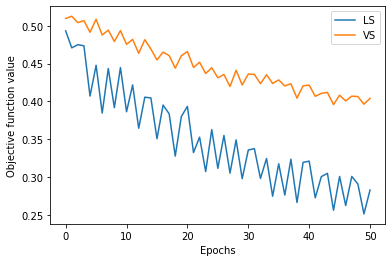

In [4]:
import matplotlib.pyplot as plt

plt.plot(objective_values_LS, label='LS')
plt.plot(objective_values_VS, label='VS')
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.legend()
plt.show()


## Accuracy on test set

In [5]:
from sklearn.metrics import accuracy_score
print('Accuracy = %.3f' % accuracy_score(yTS, yTSpred))

Accuracy = 0.980


## Plot alphas

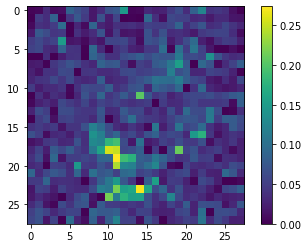

In [6]:
plt.imshow(alphas, vmin=0)
plt.colorbar()
plt.show()